<a href="https://colab.research.google.com/github/GRACENGARI/CUSTOMER-SEGMENTATION-DBSCAN/blob/main/CUSTOMER_SEGMENTATION_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image


In [ ]:
uploaded =files.upload()

Saving Untitled.jpg to Untitled (1).jpg


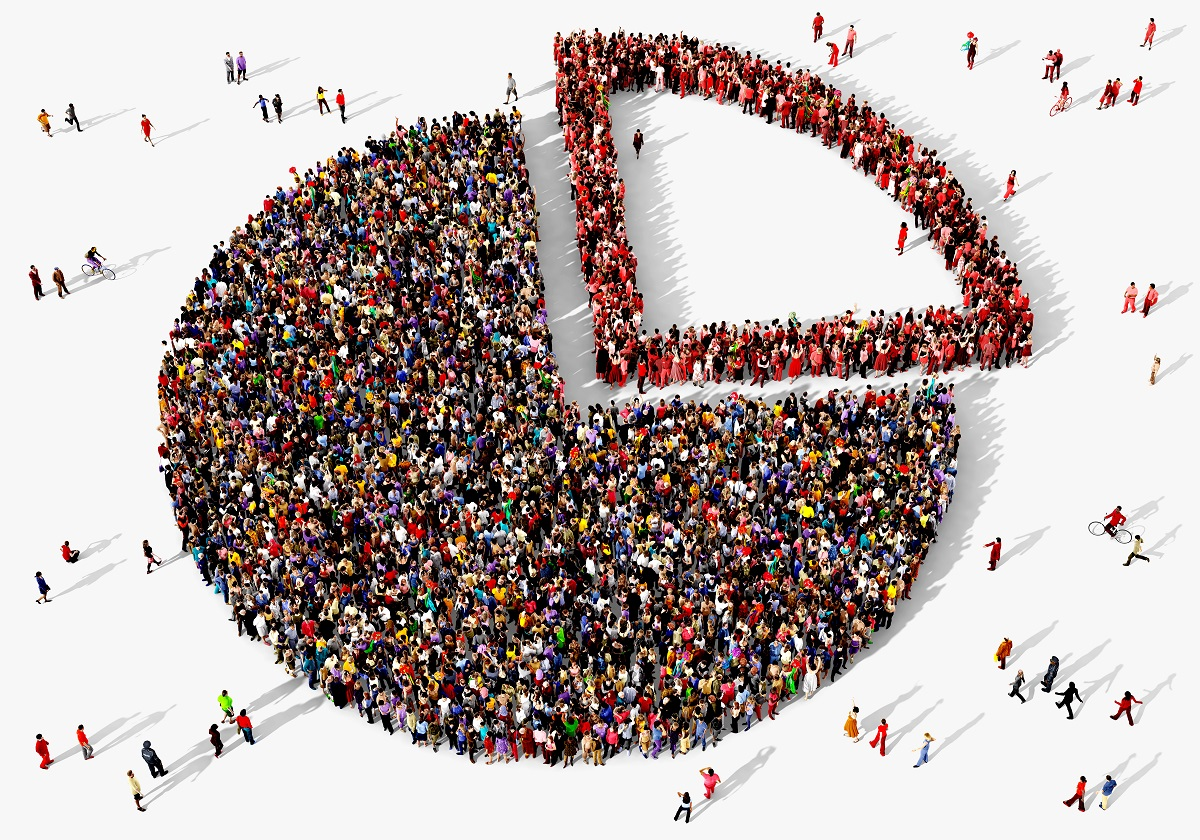

In [ ]:
Image("/content/Untitled.jpg",width=800)

INTRODUCTION
This notebook explores customer segmentation and analysis based on a dataset from a shopping mall.This dataset includes customer information such as age,gender,annual income,and spending score along with unique identifiers and gender

DATASET OVERVIEW
Customer ID-A unique identifier for each customer
Gender-Customer gender(male or female)
Age-Customer Age
Annual income(k$):Customer annual income  in thousands of dollars
Spending Score(1-1000):A score reflecting customer spending behaviour and habits

PURPOSE:
The goal of this analysis is to cluster  customers based on their attributes and behaviours .By segmenting customers,we aim to gain insights into their preferences and tailor marketing strategies to improve customer satisfaction and optimize business operations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
#checking for null values
df.sum().isnull()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
#EXPLORATORY DATA ANALYSIS
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#DESCRIPTIVE STATISTICS
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#drop the customer id column as it is unecessary
df.drop(["CustomerID"], axis = 1, inplace=True)

In [ ]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.rename(columns={'Genre':"Gender"},inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


UNIVARIATE ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<ipython-input-75-1be28360e6f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df,palette="mako")


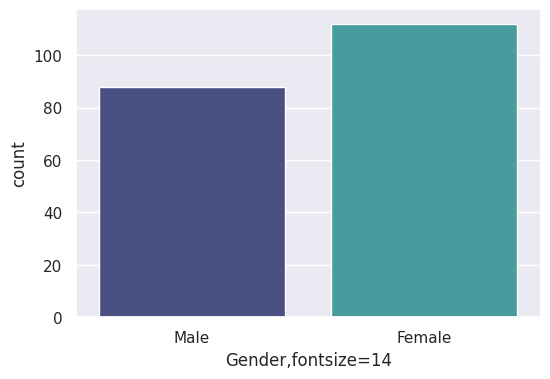

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender",data=df,palette="mako")
plt.xlabel("Gender,fontsize=14")
plt.show()

<ipython-input-76-4e41548583fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"],kde=True,color="orange",bins=10)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

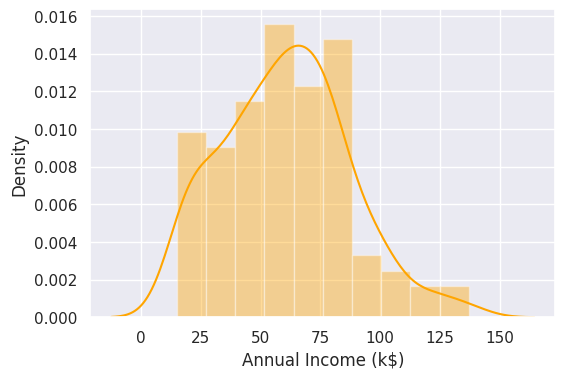

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Annual Income (k$)"],kde=True,color="orange",bins=10)

<ipython-input-77-a4f21aeb17d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],kde=True,color="orange",bins=10)


<Axes: xlabel='Age', ylabel='Density'>

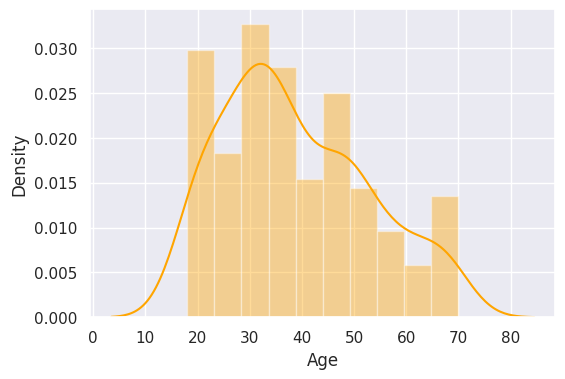

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Age"],kde=True,color="orange",bins=10)

<ipython-input-78-d260990a5ef9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"],kde=True,color="orange",bins=10)


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

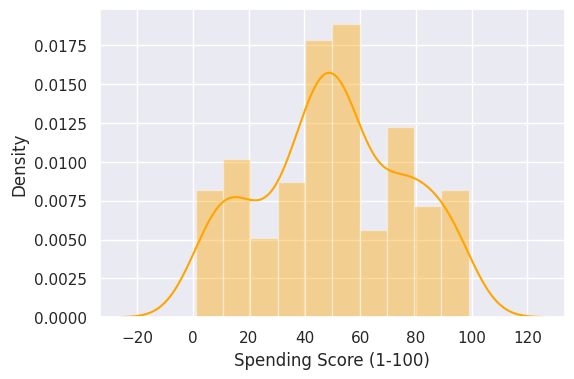

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["Spending Score (1-100)"],kde=True,color="orange",bins=10)

EDA(EXPLORATORY DATA ANALYSIS)

REMOVING DUPLICATES

In [ ]:
df.duplicated().sum()

0

CHECK AND REMOVE NULL VALUES

In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

REMOVE OUTLIERS

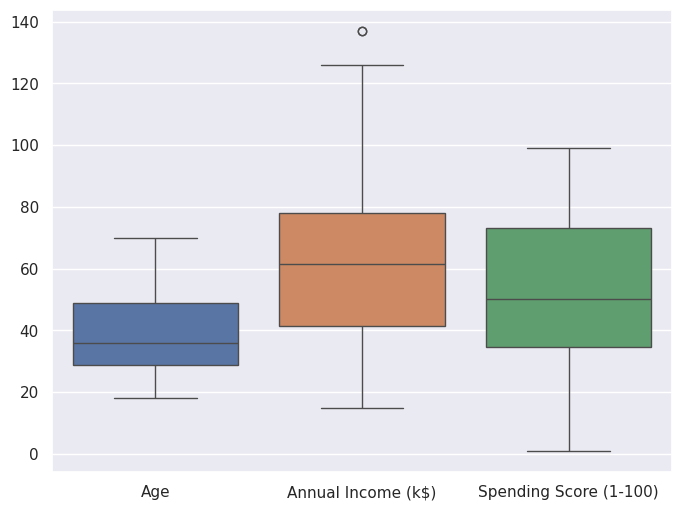

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR =Q3-Q1
  lower_range = Q1-(1.5*IQR)
  upper_range =  Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
lower_range, upper_range = remove_outlier(df["Annual Income (k$)"])
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"] > upper_range, upper_range, df["Annual Income (k$)"])
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"] < lower_range, lower_range, df["Annual Income (k$)"])

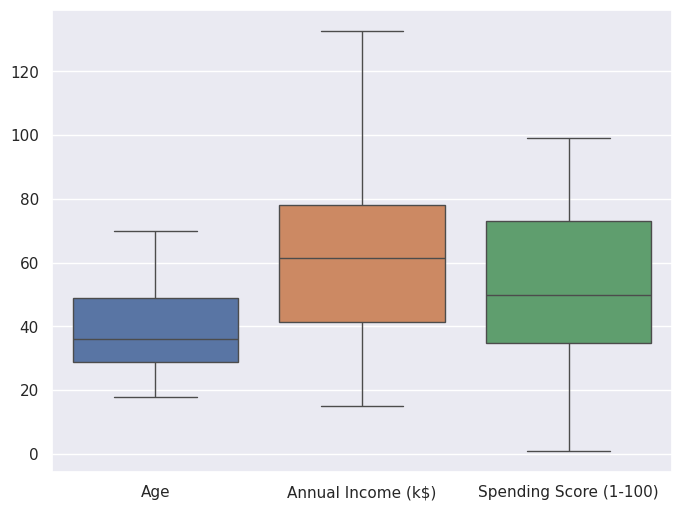

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

BIVARIATE ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


Text(0, 0.5, 'Age')

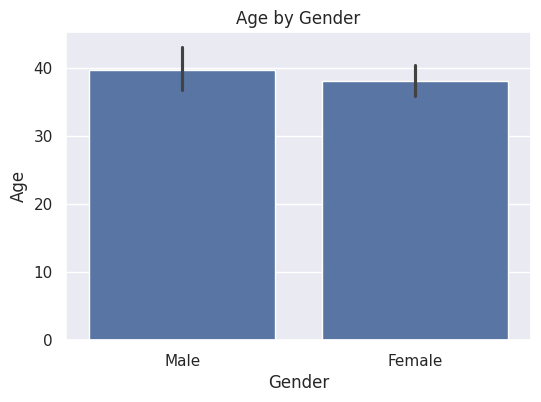

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender",y="Age",data=df)
plt.title("Age by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")

Text(0, 0.5, 'Annual Income (k$)')

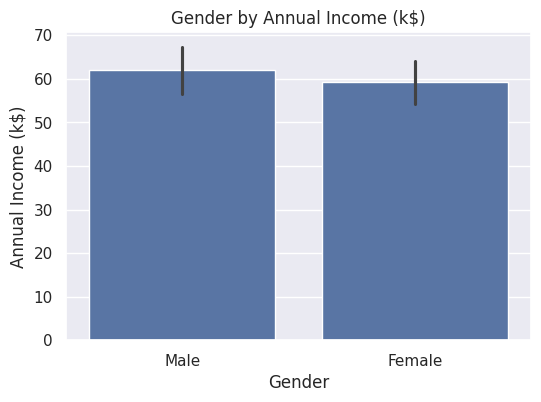

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender",y="Annual Income (k$)",data=df)
plt.title("Gender by Annual Income (k$)")
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Spending Score (1-100)')

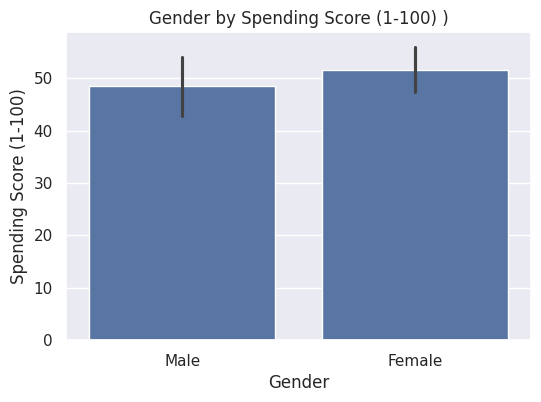

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender",y="Spending Score (1-100)",data=df)
plt.title("Gender by Spending Score (1-100) )")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")

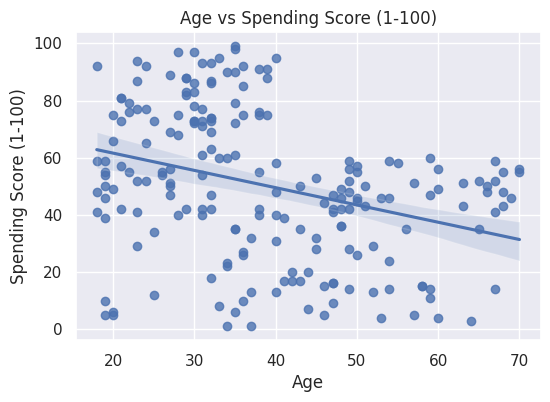

In [ ]:
sns.regplot(x="Age",y="Spending Score (1-100)",data=df,color="b")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score (1-100)")
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"])
def plots(num_cols,variable):
  plt.figurefigsize=(15,6)
  sns.distplot(num_cols[variable],kde=True,bins=10)
  plt.title(variable)
  plt.subplot(1,2,2)
  stats.probplot(num_cols[variable],dist="norm",plot=pylab)
  plt.title(variable)
  plt.show()
  for i in num_cols.columns:
    plots(num_cols,i)

<ipython-input-97-b73d408c8ed0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm",ax=ax)


<Axes: >

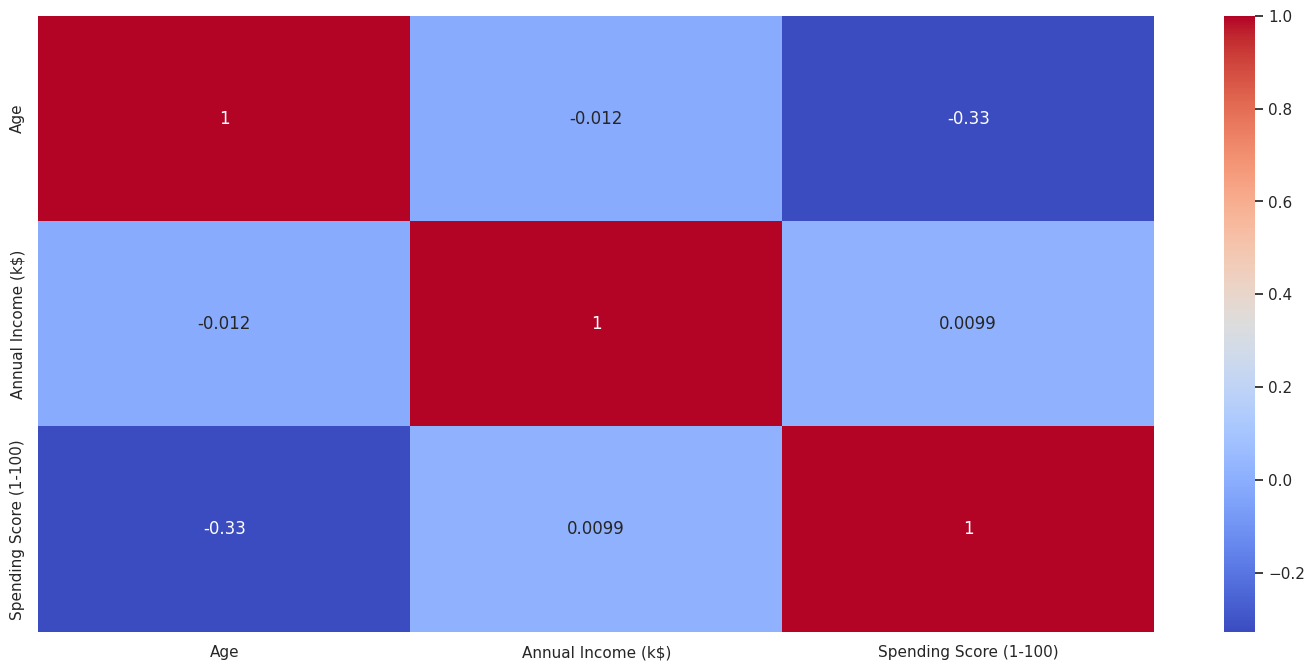

In [ ]:
fig,ax = plt.subplots(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",ax=ax)

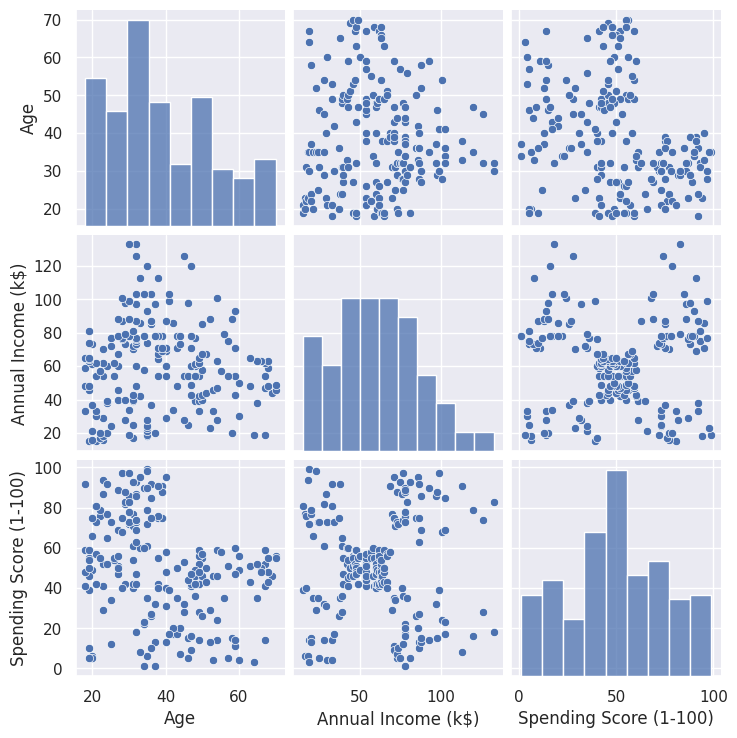

In [ ]:
sns.pairplot(df)
plt.show()

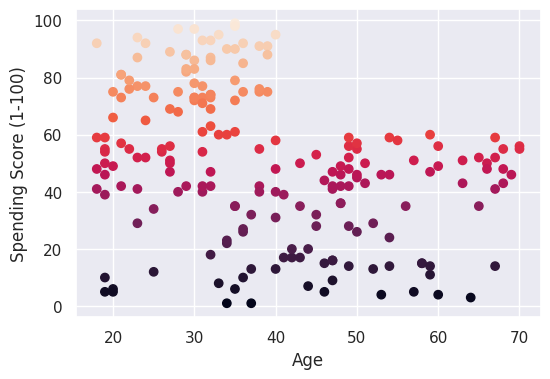

In [ ]:
# @title Spending Score by Age

import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Spending Score (1-100)'])
plt.xlabel('Age')
_ = plt.ylabel('Spending Score (1-100)')

insight:people within the age of 20-40 have higher spending score

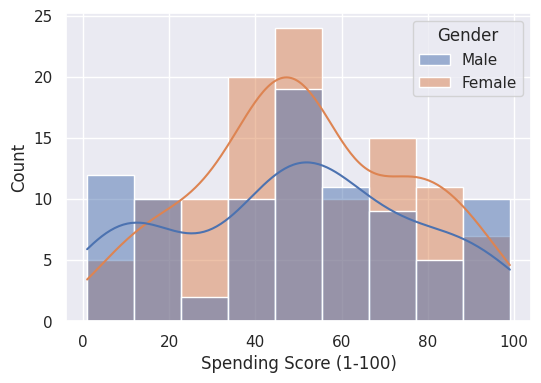

In [ ]:
# @title Spending Score Distribution by Gender

import matplotlib.pyplot as plt
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', kde=True)
plt.xlabel('Spending Score (1-100)')
_ = plt.ylabel('Count')

DROP COLUMNS THAT ARE NOT USED FURTHER

In [ ]:
X = df.iloc[:,[2,3]]


In [ ]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40


FEATURE ENGINEERING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled





array([[-1.74542941, -0.43480148],
       [-1.74542941,  1.19570407],
       [-1.70708307, -1.71591298],
       [-1.70708307,  1.04041783],
       [-1.66873673, -0.39597992],
       [-1.66873673,  1.00159627],
       [-1.6303904 , -1.71591298],
       [-1.6303904 ,  1.70038436],
       [-1.59204406, -1.83237767],
       [-1.59204406,  0.84631002],
       [-1.59204406, -1.4053405 ],
       [-1.59204406,  1.89449216],
       [-1.55369772, -1.36651894],
       [-1.55369772,  1.04041783],
       [-1.55369772, -1.44416206],
       [-1.55369772,  1.11806095],
       [-1.51535138, -0.59008772],
       [-1.51535138,  0.61338066],
       [-1.43865871, -0.82301709],
       [-1.43865871,  1.8556706 ],
       [-1.40031237, -0.59008772],
       [-1.40031237,  0.88513158],
       [-1.36196603, -1.75473454],
       [-1.36196603,  0.88513158],
       [-1.24692702, -1.4053405 ],
       [-1.24692702,  1.23452563],
       [-1.24692702, -0.7065524 ],
       [-1.24692702,  0.41927286],
       [-1.20858069,

MODEL

In [ ]:
wscc = []

In [ ]:
from sklearn.cluster import KMeans

for i in range (1,11):
  model_kmean =KMeans(n_clusters=i,init="k-means++",random_state=0)
  model_kmean.fit(X)
  wscc.append(model_kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

(20,)


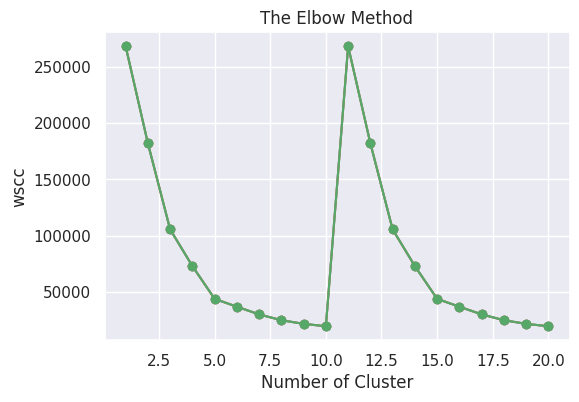

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

wscc = np.array(wscc)

print(wscc.shape)
plt.plot(range(1, len(wscc) + 1), wscc, marker="o")
plt.plot(range(1, len(wscc) + 1), wscc, marker="o")
plt.plot(range(1, len(wscc) + 1), wscc, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("wscc")
plt.show()

In [ ]:
model_kmean = KMeans(n_clusters=5,random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_cluster = model_kmean.predict(X)


In [ ]:
y_cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_cluster)

0.5549741217783033

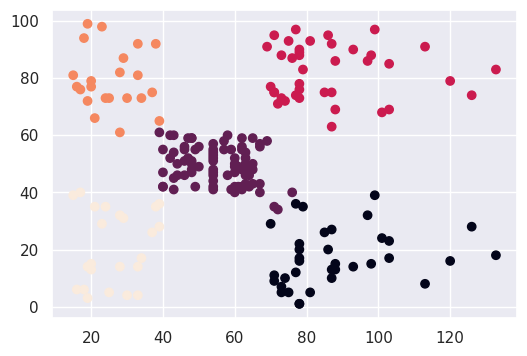

In [ ]:
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_cluster)

ERROR: Could not find a version that satisfies the requirement scipy.cluster.hierarchy (from versions: none)
ERROR: No matching distribution found for scipy.cluster.hierarchy


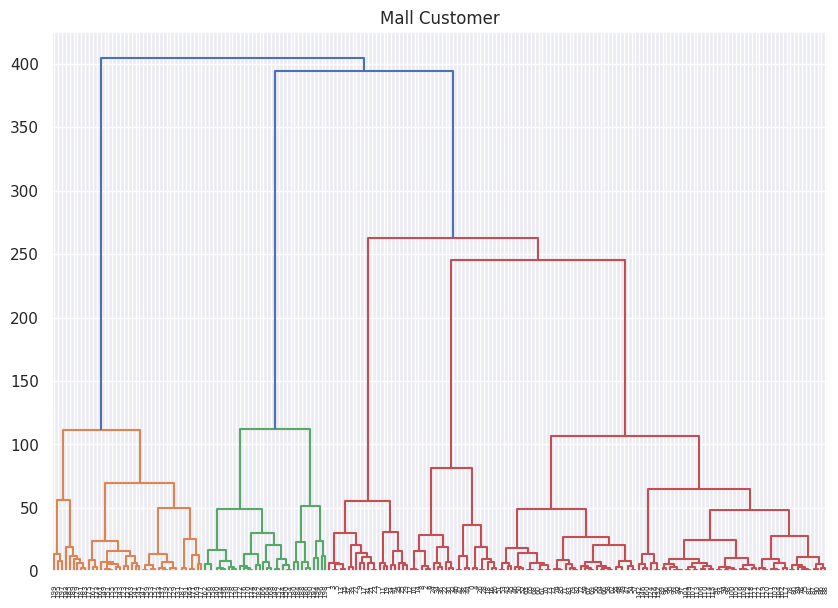

In [ ]:
!pip install scipy.cluster.hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
if 'X' not in globals():
    raise ValueError("Variable 'X' is not defined.")
plt.figure(figsize=(10, 7))
plt.title("Mall Customer")
dend = dendrogram(linkage(X, method="ward"))
plt.show()



<Axes: >

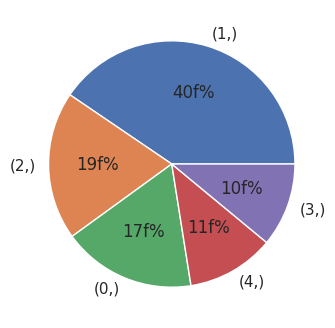

In [ ]:
y_cluster = pd.DataFrame(y_cluster)
y_cluster.value_counts().plot.pie(autopct='%.if%%')

AGGLOMERATIVE CLUSTERING

In [ ]:
model_agg = AgglomerativeClustering(n_clusters=5)


In [ ]:
y_pred = model_kmean.predict(X)

In [ ]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
silhouette_score(X,y_pred)

0.5549741217783033

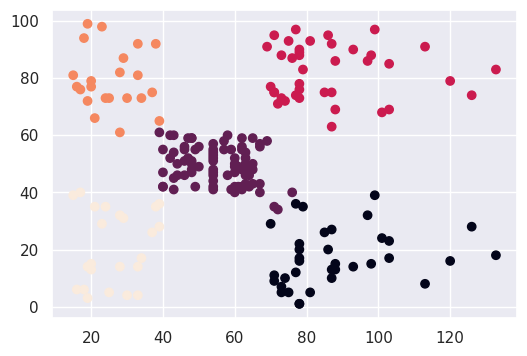

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_pred)

<Axes: >

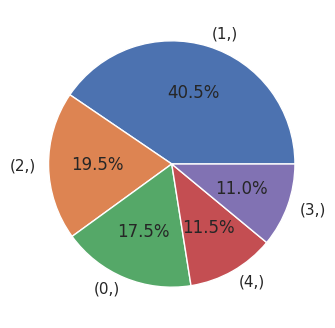

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts().plot.pie(autopct="%.1f%%")